# Part 4 -The Love Letter

![Compare Letters.jpg](<attachment:Compare Letters.jpg>)
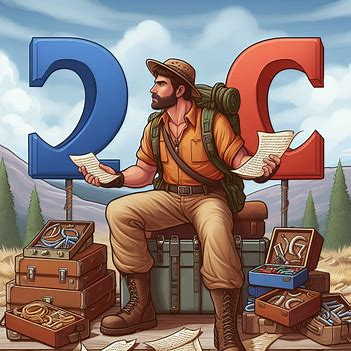

![Question_Part 4.jpg](<attachment:Question_Part 4.jpg>)
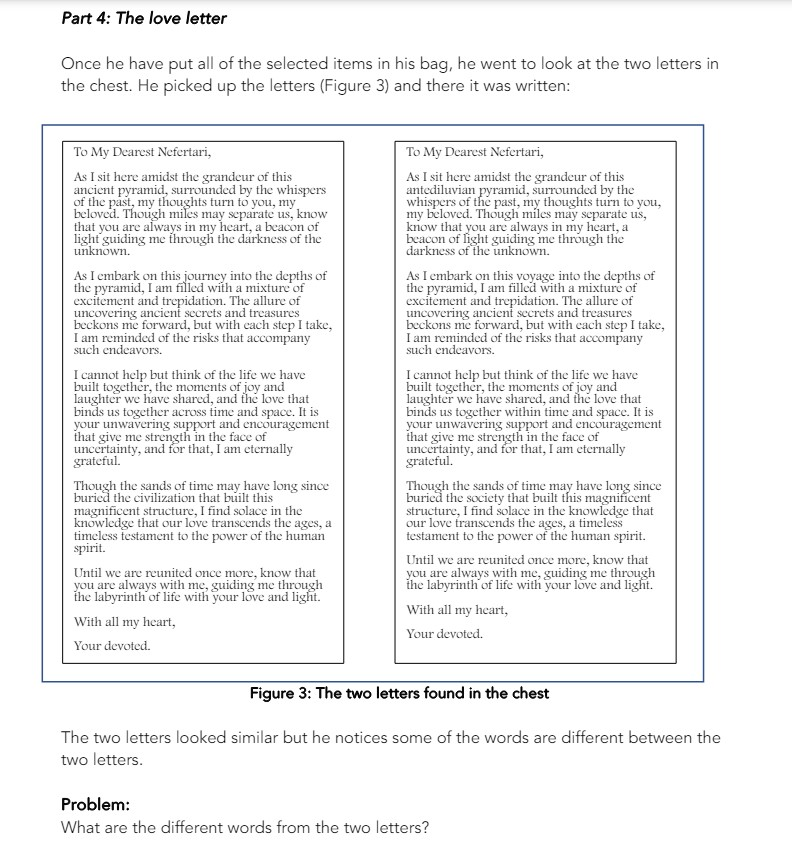

# Table for Comparison

| **Aspect** | Set Operation | Brute Force | Hash Map |
| -------|------------------|---------------|----------------|
| **Intro** | This algorithm involves tokenization and compares the word sets using symmetric difference operation, returning a set of unique words in each letter. | This algorithm involves tokenization and exhaustively compares every word in the letters to identify differences. <br><br>It checks each word starting from the beginning of both paragraphs and records the index and words that are different | This algorithm involves tokenization and uses hash maps (dictionaries) to store word frequencies and compares them to identify differences. <br><br>If the word is absent in the other hash map or has a different frequency, the word is considered the difference. |
| **Time Complexity** | O(n + m), where n and m are the number of words of the inputs | O(n), where n is the number of words in the longer letter | O(n + m), where n and m are the number of words of the inputs |
| **Advantages** | Simplicity: It is straightforward and easy to understand. It can be implemented quickly without applying complex setup <br><br>Efficiency: Quick execution for medium-sized texts and consume minimal memory resources<br><br>Extensible: It is scalable to handle comparisons of more than two texts | Predictable Performance: It has consistent behaviour where it runs in linear time complexity<br><br>Positional Sensitivity: It provides exact positional information for each difference found | Versatility: It applies the underlying principle of the algorithm to other problems that involve frequency comparison <br><br>Simplicity: It is straightforward and easy to understand. It is suitable to apply to problems without complex data structures|
| **Limitations** | Order Insensitivity: It does not consider the order in which words appear<br><br>Positional Context: It does not provide information about which words are different in the same position | Scalability: It becomes inefficient as the input size grows. Linear time complexity doesn’t not guarantee optimal performance for extremely large inputs<br><br>Redundancy: It exhaustively compares each word between two inputs, causing unnecessary checks | Hash Collision: Hash collision will occur when different words may assigned to same hash value, leading to incorrect frequency counts<br><br>Memory Usage: It requires memory that is proportional to the number of unique words in the texts. Therefore, it will be memory-intensive if the texts contains a large number of unique words |







## Justification
<font size="4">
<b>Time Complexity</b>: Brute Force exhibits a lower time complexity of O(n), where N represents the maximum length of the two letters. <br><br>
<b>Positional Information</b>: It compares character sequentially preserving positional information. Knowing the differences occur within the text is valuable for understanding and addressing discrepancies. <br><br>
<b>Directness and Simplicity</b>: Considering the moderate length of the letter, this algorithm is well suited to this problem due to its simplicity and directness, making it efficient.
</font>

## Possible Improvements/Modifications


1. Chunking<br>Divide the texts into smaller chunks, reducing the comparison scope. By comparing smaller chunks, we limit the scope to a local context.<br><br>
2. Parallelization<br>Distribute the comparison across multiple threads or processes. Each thread or process independently compares different chunks concurrently. <br><br>
3. Memoization<br>Store the results of previous comparisons and reuse them when the same inputs occur again, avoiding redundant comparisons and improving efficiency.


## Pseudocode

```pseudo
FUNCTION brute_force(letter_1, letter_2):
    // empty list to store the positions and differing words
    differences = []    ---- O(1)
    
    tokens1 = tokenize the letter_1 ---- O(n)
    tokens2 = tokenize the letter_2 ---- O(m)
    
    maxLength = max(tokens1.length, tokens2.length)   ---- O(1)
    
    FOR i from 0 to maxLength - 1:  ---- O(max(n,m)-1) ≈ O(max(n,m))
        token1 = tokens1[i] if i < words1.length else None  ---- O(1)
        token2 = tokens2[i] if i < words2.length else None  ---- O(1)
        
        // if the words are different or one is missing, record the difference
        IF token1 != token2:
            differences.append({position: i, word1: word1, word2: word2})   ---- O(1)
    
    RETURN differences  ---- O(1)

Overall time complexity: O(1) + O(n) + O(m) + O(1) + O(max(n,m)) + O(1) + O(1) + O(1) + O(1) = O(max(n,m))

<font size="5">
We focus on the dominant term, which is the maximum length, because it determines the overall behaviour as the input size varies.

<font color = #00FFFF> Overall time complexity: O(max(n,m))
</font>

## Code Implementation
### Sample Input

In [1]:
letter_1 = """To My Dearest Nefertari,

As I sit here amidst the grandeur of this ancient pyramid, surrounded by the whispers of the past, my thoughts turn to you, my beloved. Though miles may separate us, know that you are always in my heart, a beacon of light guiding me through the darkness of the unknown.

As I embark on this journey into the depths of the pyramid, I am filled with a mixture of excitement and trepidation. The allure of uncovering ancient secrets and treasures beckons me forward, but with each step I take, I am reminded of the risks that accompany such endeavors.

I cannot help but think of the life we have built together, the moments of joy and laughter we have shared, and the love that binds us together across time and space. It is your unwavering support and encouragement that give me strength in the face of uncertainty, and for that, I am eternally grateful.

Though the sands of time may have long since buried the civilization that built this magnificent structure, I find solace in the knowledge that our love transcends the ages, a timeless testament to the power of the human spirit.

Until we are reunited once more, know that you are always with me, guiding me through the labyrinth of life with your love and light.

With all my heart,
Your devoted."""

letter_2 = """To My Dearest Nefertari,

As I sit here amidst the grandeur of this antediluvian pyramid, surrounded by the whispers of the past, my thoughts turn to you, my beloved. Though miles may separate us, know that you are always in my heart, a beacon of light guiding me through the darkness of the unknown.

As I embark on this voyage into the depths of the pyramid, I am filled with a mixture of excitement and trepidation. The allure of uncovering ancient secrets and treasures beckons me forward, but with each step I take, I am reminded of the risks that accompany such endeavors.

I cannot help but think of the life we have built together, the moments of joy and laughter we have shared, and the love that binds us together within time and space. It is your unwavering support and encouragement that give me strength in the face of uncertainty, and for that, I am eternally grateful.

Though the sands of time may have long since buried the society that built this magnificent structure, I find solace in the knowledge that our love transcends the ages, a timeless testament to the power of the human spirit.

Until we are reunited once more, know that you are always with me, guiding me through the labyrinth of life with your love and light. 

With all my heart,
Your devoted."""

## Implement Brute Force Algorithm

In [2]:
def brute_force(letter_1, letter_2):
    differences = []  # Empty list to store the positions and differing words
    
    tokens1 = letter_1.split()  # Tokenize the letter_1
    tokens2 = letter_2.split()  # Tokenize the letter_2
    
    maxLength = max(len(tokens1), len(tokens2))
    
    for i in range(maxLength):
        token1 = tokens1[i] if i < len(tokens1) else None
        token2 = tokens2[i] if i < len(tokens2) else None
        
        # If the words are different or one is missing, record the difference
        if token1 != token2:
            differences.append({"position": i, "word1": token1, "word2": token2})
    
    return differences

## Sample Output

In [3]:
# Output
differences = brute_force(letter_1, letter_2)

for diff in differences:
    if diff["word1"] is None:
        print(f"At position {diff['position']} in letter 1, missing word: {diff['word2']}")
    elif diff["word2"] is None:
        print(f"At position {diff['position']} in letter 2, missing word: {diff['word1']}")
    else:
        print(f"At position {diff['position']}, different words: {diff['word1']} and {diff['word2']}")

At position 13, different words: ancient and antediluvian
At position 59, different words: journey and voyage
At position 131, different words: across and within
At position 169, different words: civilization and society
